<a href="https://colab.research.google.com/github/Blazekiller8/SalvageAI/blob/main/yolo_nas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installations
!pip install super-gradients
!pip install torch
!pip install roboflow
!pip install supervision

# Restart kerel/runtime after installation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

In [ ]:
# Import the dataset from Roboflow
import roboflow
from roboflow import Roboflow

# Without API Key
# roboflow.login()
# rf = Roboflow()

# With API Key
rf = Roboflow(api_key="VXuKU01F5G92IbaueYM1")
project = rf.workspace("d2r-vmode").project("salvageai")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SalvageAI-1 in yolov5pytorch:: 100%|██████████| 8012/8012 [00:03<00:00, 2654.40it/s]


In [ ]:
# Imports
import os
import requests
import torch
import zipfile
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import tqdm
from super_gradients.training import Trainer, dataloaders, models
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train,
    coco_detection_yolo_format_val
)
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import (
   DetectionMetrics_050,
   DetectionMetrics_050_095
)
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

[2024-01-21 12:19:21] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-21 12:19:21] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


[2024-01-21 12:19:22] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-01-21 12:19:28] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-21 12:19:28] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-21 12:19:28] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
# Configurations
class config:
    #trainer params
    CHECKPOINT_DIR = 'checkpoints'
    EXPERIMENT_NAME = project.name.lower().replace(" ", "_")
    LOCATION = dataset.location
    CLASSES = sorted(project.classes.keys())
    NUM_CLASSES = len(CLASSES)

    #dataset params
    DATA_DIR = LOCATION #parent directory to where data lives
    TRAIN_IMAGES_DIR = 'train/images' #child dir of DATA_DIR where train images are
    TRAIN_LABELS_DIR = 'train/labels' #child dir of DATA_DIR where train labels are

    VAL_IMAGES_DIR = 'valid/images' #child dir of DATA_DIR where validation images are
    VAL_LABELS_DIR = 'valid/labels' #child dir of DATA_DIR where validation labels are

    TEST_IMAGES_DIR = 'test/images' #child dir of DATA_DIR where test images are
    TEST_LABELS_DIR = 'test/labels' #child dir of DATA_DIR where test labels are

    #dataloader params - you can add whatever PyTorch dataloader params you have
    #could be different across train, val, and test
    DATALOADER_PARAMS={
    'batch_size':16,
    'num_workers':2
    }
    MAX_EPOCHS = 10

    # model params
    MODEL_NAME = 'yolo_nas_l' # choose from yolo_nas_s, yolo_nas_m, yolo_nas_l
    PRETRAINED_WEIGHTS = 'coco' #only one option here: coco
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    CONFIDENCE_TRESHOLD = 0.2 # Note, you can set the confidence threshold value as you please.

In [ ]:
# Initialize the Trainer
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME, ckpt_root_dir=config.CHECKPOINT_DIR)

[2024-01-21 12:27:12] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 2200/2200 [00:00<00:00, 3877.07it/s]
[2024-01-21 12:27:13] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 1700/1700 [00:00<00:00, 3945.08it/s]
[2024-01-21 12:27:13] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 100/100 [00:00<00:00, 3884.91it/s]


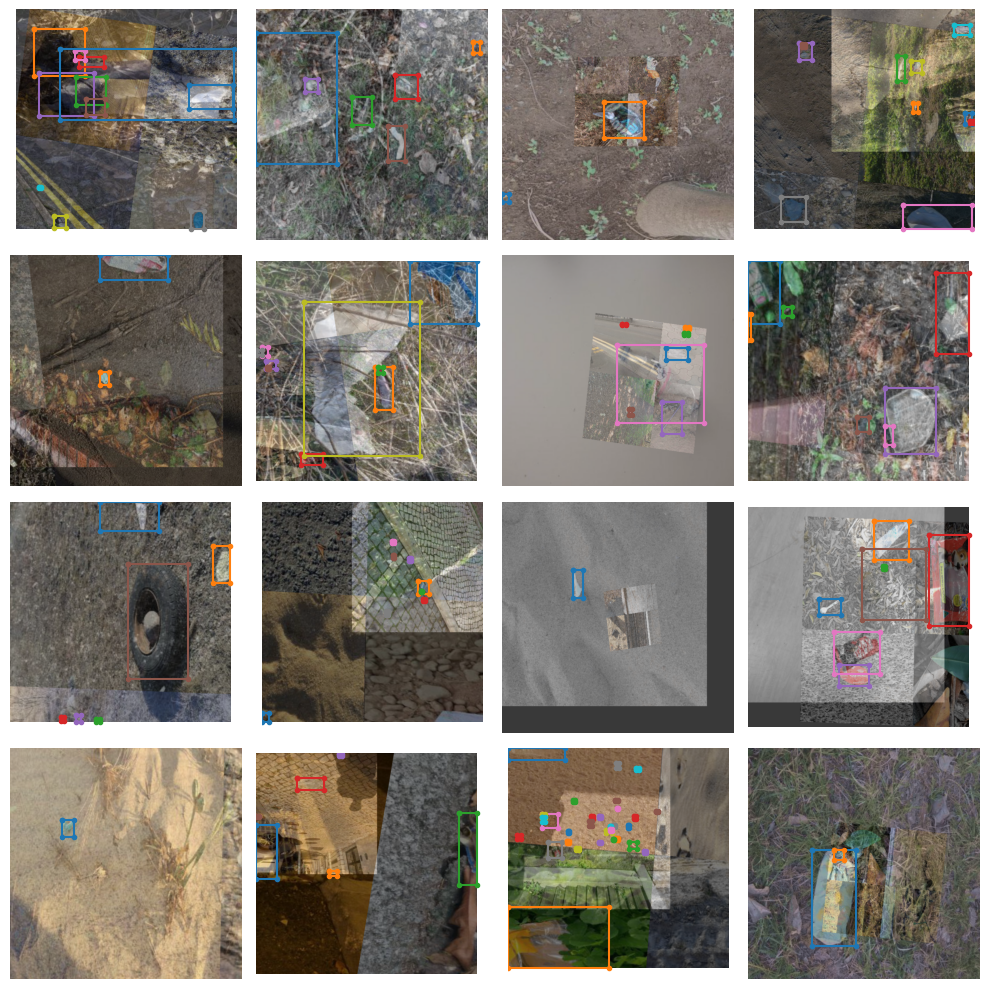

In [ ]:
# Load the Datasets and Dataloaders
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.VAL_IMAGES_DIR,
        'labels_dir': config.VAL_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TEST_IMAGES_DIR,
        'labels_dir': config.TEST_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

train_data.dataset.plot()

In [ ]:
# Instantiate the Model
model = models.get(config.MODEL_NAME,
                  num_classes=config.NUM_CLASSES,
                  pretrained_weights=config.PRETRAINED_WEIGHTS
                  ).to(config.DEVICE)

[2024-01-21 12:27:22] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:00<00:00, 278MB/s]
[2024-01-21 12:27:24] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [ ]:
# Define metrics and training parameters
train_params = {
   'silent_mode': False,
   "average_best_models":True,
   "warmup_mode": "linear_epoch_step",
   "warmup_initial_lr": 1e-6,
   "lr_warmup_epochs": 3,
   "initial_lr": 5e-4,
   "lr_mode": "cosine",
   "cosine_final_lr_ratio": 0.1,
   "optimizer": "Adam",
   "optimizer_params": {"weight_decay": 0.0001},
   "zero_weight_decay_on_bias_and_bn": True,
   "ema": True,
   "ema_params": {"decay": 0.9, "decay_type": "threshold"},
   "max_epochs": config.MAX_EPOCHS,
   "mixed_precision": True,
   "loss": PPYoloELoss(
       use_static_assigner=False,
       num_classes=config.NUM_CLASSES,
       reg_max=16
   ),
   "valid_metrics_list": [
       DetectionMetrics_050_095(
           score_thres=0.1,
           top_k_predictions=300,
           num_cls=config.NUM_CLASSES,
           normalize_targets=True,
           post_prediction_callback=PPYoloEPostPredictionCallback(
               score_threshold=0.01,
               nms_top_k=1000,
               max_predictions=300,
               nms_threshold=0.7
           )
       )
   ],
   "metric_to_watch": 'mAP@0.50:0.95'
}

In [ ]:
  # Train the model
trainer.train(
   model=model,
   training_params=train_params,
   train_loader=train_data,
   valid_loader=val_data
)

[2024-01-21 12:27:45] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240121_122745_615768`
[2024-01-21 12:27:45] INFO - sg_trainer.py - Checkpoints directory: checkpoints/salvageai/RUN_20240121_122745_615768
[2024-01-21 12:27:45] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints/salvageai/RUN_20240121_122745_615768/console_Jan21_12_27_45.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
[2024-01-21 12:27:53] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            2200       (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         137     

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.3342
│   ├── Ppyoloeloss/loss_iou = 0.6494
│   ├── Ppyoloeloss/loss_dfl = 0.6522
│   └── Ppyoloeloss/loss = 3.6357
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.6637
    ├── Ppyoloeloss/loss_iou = 0.4459
    ├── Ppyoloeloss/loss_dfl = 0.5016
    ├── Ppyoloeloss/loss = 3.6112
    ├── Precision@0.50:0.95 = 0.0007
    ├── Recall@0.50:0.95 = 0.0001
    ├── Map@0.50:0.95 = 0.0009
    └── F1@0.50:0.95 = 0.0001



Validating epoch 1: 100%|██████████| 106/106 [01:15<00:00,  1.41it/s]
[2024-01-21 12:40:05] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 12:40:05] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.033649981021881104


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.6741
│   │   ├── Epoch N-1      = 2.3342 (↘ -0.6601)
│   │   └── Best until now = 2.3342 (↘ -0.6601)
│   ├── Ppyoloeloss/loss_iou = 0.577
│   │   ├── Epoch N-1      = 0.6494 (↘ -0.0723)
│   │   └── Best until now = 0.6494 (↘ -0.0723)
│   ├── Ppyoloeloss/loss_dfl = 0.5712
│   │   ├── Epoch N-1      = 0.6522 (↘ -0.081)
│   │   └── Best until now = 0.6522 (↘ -0.081)
│   └── Ppyoloeloss/loss = 2.8224
│       ├── Epoch N-1      = 3.6357 (↘ -0.8134)
│       └── Best until now = 3.6357 (↘ -0.8134)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.7493
    │   ├── Epoch N-1      = 2.6637 (↘ -0.9144)
    │   └── Best until now = 2.6637 (↘ -0.9144)
    ├── Ppyoloeloss/loss_iou = 0.4617
    │   ├── Epoch N-1      = 0.4459 (↗ 0.0158)
    │   └── Best until now = 0.4459 (↗ 0.0158)
    ├── Ppyoloeloss/loss_dfl = 0.4699
    │   ├── Epoch N-1      = 0.5016 (↘ -0.0317)
    │   └── Best until now = 0.5016 (↘ -0.0317)
    ├── Ppyoloeloss/loss = 

Validating epoch 2: 100%|██████████| 106/106 [01:13<00:00,  1.44it/s]
[2024-01-21 12:46:18] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 12:46:18] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.0380682647228241


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.5336
│   │   ├── Epoch N-1      = 1.6741 (↘ -0.1405)
│   │   └── Best until now = 1.6741 (↘ -0.1405)
│   ├── Ppyoloeloss/loss_iou = 0.5758
│   │   ├── Epoch N-1      = 0.577  (↘ -0.0012)
│   │   └── Best until now = 0.577  (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.5715
│   │   ├── Epoch N-1      = 0.5712 (↗ 0.0003)
│   │   └── Best until now = 0.5712 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 2.681
│       ├── Epoch N-1      = 2.8224 (↘ -0.1414)
│       └── Best until now = 2.8224 (↘ -0.1414)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.7163
    │   ├── Epoch N-1      = 1.7493 (↘ -0.033)
    │   └── Best until now = 1.7493 (↘ -0.033)
    ├── Ppyoloeloss/loss_iou = 0.4821
    │   ├── Epoch N-1      = 0.4617 (↗ 0.0204)
    │   └── Best until now = 0.4459 (↗ 0.0362)
    ├── Ppyoloeloss/loss_dfl = 0.5113
    │   ├── Epoch N-1      = 0.4699 (↗ 0.0415)
    │   └── Best until now = 0.4699 (↗ 0.0415)
    ├── Ppyoloeloss/loss = 2.70

Validating epoch 3: 100%|██████████| 106/106 [01:13<00:00,  1.44it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.5169
│   │   ├── Epoch N-1      = 1.5336 (↘ -0.0168)
│   │   └── Best until now = 1.5336 (↘ -0.0168)
│   ├── Ppyoloeloss/loss_iou = 0.5873
│   │   ├── Epoch N-1      = 0.5758 (↗ 0.0115)
│   │   └── Best until now = 0.5758 (↗ 0.0115)
│   ├── Ppyoloeloss/loss_dfl = 0.5858
│   │   ├── Epoch N-1      = 0.5715 (↗ 0.0143)
│   │   └── Best until now = 0.5712 (↗ 0.0146)
│   └── Ppyoloeloss/loss = 2.69
│       ├── Epoch N-1      = 2.681  (↗ 0.009)
│       └── Best until now = 2.681  (↗ 0.009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.7998
    │   ├── Epoch N-1      = 1.7163 (↗ 0.0835)
    │   └── Best until now = 1.7163 (↗ 0.0835)
    ├── Ppyoloeloss/loss_iou = 0.4865
    │   ├── Epoch N-1      = 0.4821 (↗ 0.0044)
    │   └── Best until now = 0.4459 (↗ 0.0406)
    ├── Ppyoloeloss/loss_dfl = 0.5056
    │   ├── Epoch N-1      = 0.5113 (↘ -0.0058)
    │   └── Best until now = 0.4699 (↗ 0.0357)
    ├── Ppyoloeloss/loss = 2.7919
   

Validating epoch 4: 100%|██████████| 106/106 [01:13<00:00,  1.43it/s]
[2024-01-21 12:58:39] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 12:58:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.04786360636353493


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4885
│   │   ├── Epoch N-1      = 1.5169 (↘ -0.0284)
│   │   └── Best until now = 1.5169 (↘ -0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.5691
│   │   ├── Epoch N-1      = 0.5873 (↘ -0.0182)
│   │   └── Best until now = 0.5758 (↘ -0.0067)
│   ├── Ppyoloeloss/loss_dfl = 0.5723
│   │   ├── Epoch N-1      = 0.5858 (↘ -0.0135)
│   │   └── Best until now = 0.5712 (↗ 0.0011)
│   └── Ppyoloeloss/loss = 2.6299
│       ├── Epoch N-1      = 2.69   (↘ -0.0601)
│       └── Best until now = 2.681  (↘ -0.0511)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.8165
    │   ├── Epoch N-1      = 1.7998 (↗ 0.0166)
    │   └── Best until now = 1.7163 (↗ 0.1002)
    ├── Ppyoloeloss/loss_iou = 0.4717
    │   ├── Epoch N-1      = 0.4865 (↘ -0.0148)
    │   └── Best until now = 0.4459 (↗ 0.0258)
    ├── Ppyoloeloss/loss_dfl = 0.4941
    │   ├── Epoch N-1      = 0.5056 (↘ -0.0114)
    │   └── Best until now = 0.4699 (↗ 0.0243)
    ├── Ppyoloeloss/loss = 

Validating epoch 5: 100%|██████████| 106/106 [01:14<00:00,  1.42it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4498
│   │   ├── Epoch N-1      = 1.4885 (↘ -0.0387)
│   │   └── Best until now = 1.4885 (↘ -0.0387)
│   ├── Ppyoloeloss/loss_iou = 0.5544
│   │   ├── Epoch N-1      = 0.5691 (↘ -0.0147)
│   │   └── Best until now = 0.5691 (↘ -0.0147)
│   ├── Ppyoloeloss/loss_dfl = 0.5559
│   │   ├── Epoch N-1      = 0.5723 (↘ -0.0164)
│   │   └── Best until now = 0.5712 (↘ -0.0153)
│   └── Ppyoloeloss/loss = 2.5601
│       ├── Epoch N-1      = 2.6299 (↘ -0.0697)
│       └── Best until now = 2.6299 (↘ -0.0697)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.7611
    │   ├── Epoch N-1      = 1.8165 (↘ -0.0554)
    │   └── Best until now = 1.7163 (↗ 0.0448)
    ├── Ppyoloeloss/loss_iou = 0.4711
    │   ├── Epoch N-1      = 0.4717 (↘ -0.0005)
    │   └── Best until now = 0.4459 (↗ 0.0252)
    ├── Ppyoloeloss/loss_dfl = 0.4813
    │   ├── Epoch N-1      = 0.4941 (↘ -0.0128)
    │   └── Best until now = 0.4699 (↗ 0.0114)
    ├── Ppyoloeloss/loss 

Validating epoch 6: 100%|██████████| 106/106 [01:14<00:00,  1.42it/s]
[2024-01-21 13:11:19] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 13:11:19] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.06393136084079742


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4205
│   │   ├── Epoch N-1      = 1.4498 (↘ -0.0293)
│   │   └── Best until now = 1.4498 (↘ -0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.5349
│   │   ├── Epoch N-1      = 0.5544 (↘ -0.0196)
│   │   └── Best until now = 0.5544 (↘ -0.0196)
│   ├── Ppyoloeloss/loss_dfl = 0.5408
│   │   ├── Epoch N-1      = 0.5559 (↘ -0.0151)
│   │   └── Best until now = 0.5559 (↘ -0.0151)
│   └── Ppyoloeloss/loss = 2.4962
│       ├── Epoch N-1      = 2.5601 (↘ -0.064)
│       └── Best until now = 2.5601 (↘ -0.064)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.6325
    │   ├── Epoch N-1      = 1.7611 (↘ -0.1285)
    │   └── Best until now = 1.7163 (↘ -0.0838)
    ├── Ppyoloeloss/loss_iou = 0.4494
    │   ├── Epoch N-1      = 0.4711 (↘ -0.0218)
    │   └── Best until now = 0.4459 (↗ 0.0034)
    ├── Ppyoloeloss/loss_dfl = 0.4688
    │   ├── Epoch N-1      = 0.4813 (↘ -0.0125)
    │   └── Best until now = 0.4699 (↘ -0.0011)
    ├── Ppyoloeloss/loss 

Validating epoch 7: 100%|██████████| 106/106 [01:15<00:00,  1.40it/s]
[2024-01-21 13:18:10] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 13:18:10] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.08067862689495087


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4013
│   │   ├── Epoch N-1      = 1.4205 (↘ -0.0192)
│   │   └── Best until now = 1.4205 (↘ -0.0192)
│   ├── Ppyoloeloss/loss_iou = 0.5182
│   │   ├── Epoch N-1      = 0.5349 (↘ -0.0167)
│   │   └── Best until now = 0.5349 (↘ -0.0167)
│   ├── Ppyoloeloss/loss_dfl = 0.5246
│   │   ├── Epoch N-1      = 0.5408 (↘ -0.0162)
│   │   └── Best until now = 0.5408 (↘ -0.0162)
│   └── Ppyoloeloss/loss = 2.444
│       ├── Epoch N-1      = 2.4962 (↘ -0.0521)
│       └── Best until now = 2.4962 (↘ -0.0521)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5729
    │   ├── Epoch N-1      = 1.6325 (↘ -0.0596)
    │   └── Best until now = 1.6325 (↘ -0.0596)
    ├── Ppyoloeloss/loss_iou = 0.4247
    │   ├── Epoch N-1      = 0.4494 (↘ -0.0247)
    │   └── Best until now = 0.4459 (↘ -0.0213)
    ├── Ppyoloeloss/loss_dfl = 0.4555
    │   ├── Epoch N-1      = 0.4688 (↘ -0.0134)
    │   └── Best until now = 0.4688 (↘ -0.0134)
    ├── Ppyoloeloss/los

Validating epoch 8: 100%|██████████| 106/106 [01:14<00:00,  1.42it/s]
[2024-01-21 13:25:06] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 13:25:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.09727312624454498


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.3712
│   │   ├── Epoch N-1      = 1.4013 (↘ -0.0301)
│   │   └── Best until now = 1.4013 (↘ -0.0301)
│   ├── Ppyoloeloss/loss_iou = 0.5005
│   │   ├── Epoch N-1      = 0.5182 (↘ -0.0177)
│   │   └── Best until now = 0.5182 (↘ -0.0177)
│   ├── Ppyoloeloss/loss_dfl = 0.519
│   │   ├── Epoch N-1      = 0.5246 (↘ -0.0055)
│   │   └── Best until now = 0.5246 (↘ -0.0055)
│   └── Ppyoloeloss/loss = 2.3908
│       ├── Epoch N-1      = 2.444  (↘ -0.0533)
│       └── Best until now = 2.444  (↘ -0.0533)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.472
    │   ├── Epoch N-1      = 1.5729 (↘ -0.1009)
    │   └── Best until now = 1.5729 (↘ -0.1009)
    ├── Ppyoloeloss/loss_iou = 0.412
    │   ├── Epoch N-1      = 0.4247 (↘ -0.0126)
    │   └── Best until now = 0.4247 (↘ -0.0126)
    ├── Ppyoloeloss/loss_dfl = 0.4449
    │   ├── Epoch N-1      = 0.4555 (↘ -0.0105)
    │   └── Best until now = 0.4555 (↘ -0.0105)
    ├── Ppyoloeloss/loss 

Validating epoch 9: 100%|██████████| 106/106 [01:13<00:00,  1.43it/s]
[2024-01-21 13:31:59] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/salvageai/RUN_20240121_122745_615768/ckpt_best.pth
[2024-01-21 13:31:59] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50:0.95: 0.10504070669412613


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.3474
│   │   ├── Epoch N-1      = 1.3712 (↘ -0.0238)
│   │   └── Best until now = 1.3712 (↘ -0.0238)
│   ├── Ppyoloeloss/loss_iou = 0.4894
│   │   ├── Epoch N-1      = 0.5005 (↘ -0.0111)
│   │   └── Best until now = 0.5005 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.5077
│   │   ├── Epoch N-1      = 0.519  (↘ -0.0114)
│   │   └── Best until now = 0.519  (↘ -0.0114)
│   └── Ppyoloeloss/loss = 2.3445
│       ├── Epoch N-1      = 2.3908 (↘ -0.0463)
│       └── Best until now = 2.3908 (↘ -0.0463)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4648
    │   ├── Epoch N-1      = 1.472  (↘ -0.0073)
    │   └── Best until now = 1.472  (↘ -0.0073)
    ├── Ppyoloeloss/loss_iou = 0.4207
    │   ├── Epoch N-1      = 0.412  (↗ 0.0086)
    │   └── Best until now = 0.412  (↗ 0.0086)
    ├── Ppyoloeloss/loss_dfl = 0.4431
    │   ├── Epoch N-1      = 0.4449 (↘ -0.0019)
    │   └── Best until now = 0.4449 (↘ -0.0019)
    ├── Ppyoloeloss/loss

[2024-01-21 13:32:57] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 10: 100%|██████████| 106/106 [01:13<00:00,  1.43it/s]


In [ ]:
# Get the best trained model
best_model = models.get(config.MODEL_NAME,
                        num_classes=config.NUM_CLASSES,
                        checkpoint_path='/content/checkpoints/salvageai/RUN_20240121_122745_615768/average_model.pth')

[2024-01-21 13:44:58] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints/salvageai/RUN_20240121_122745_615768/average_model.pth EMA checkpoint.


In [ ]:
#  Evaluate the best Model
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050_095(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=config.NUM_CLASSES,
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,                                                                              nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]


{'PPYoloELoss/loss_cls': 1.383308,
 'PPYoloELoss/loss_iou': 0.4462811,
 'PPYoloELoss/loss_dfl': 0.4787747,
 'PPYoloELoss/loss': 2.308364,
 'Precision@0.50:0.95': 0.012658712454140186,
 'Recall@0.50:0.95': 0.4409262239933014,
 'mAP@0.50:0.95': 0.16483405232429504,
 'F1@0.50:0.95': 0.02240971475839615}

[2024-01-21 13:45:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


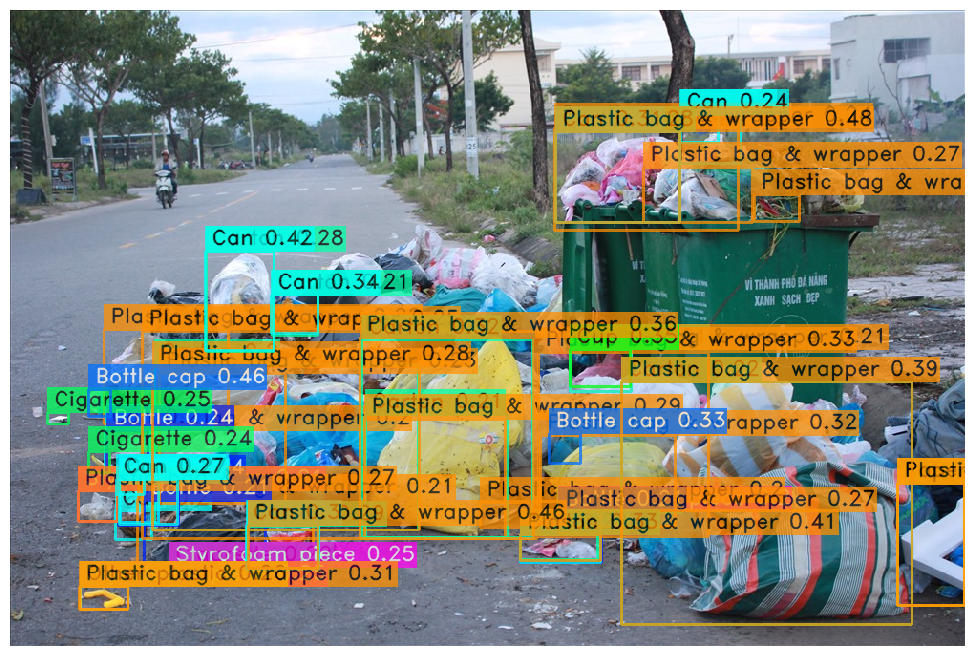

In [ ]:
# Predicting with the best model
best_model.predict("https://media-cdn-v2.laodong.vn/storage/newsportal/2018/9/28/633373/9-1_Opt.jpg", conf=config.CONFIDENCE_TRESHOLD).show()